In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [39]:
df.shape

(918, 12)

In [40]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [42]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [48]:
df.duplicated().sum()

0

In [43]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [46]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
numerical =  [i for i in df.columns if df[i].dtype != 'O']
print('Categorical:',categorical)
print('Numerical : ', numerical)

Categorical: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical :  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


###  Univariate Analysis:

#### Categorical Features:

In [49]:
print(categorical)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


The unique values in Sex are ['M' 'F']
The count of each category in Sex is : Sex
M    725
F    193
Name: count, dtype: int64


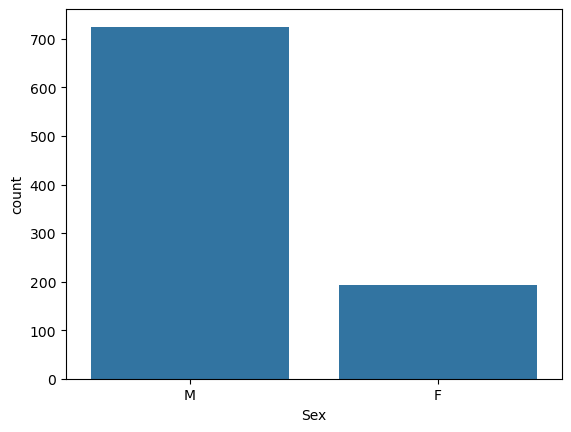

The unique values in ChestPainType are ['ATA' 'NAP' 'ASY' 'TA']
The count of each category in ChestPainType is : ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


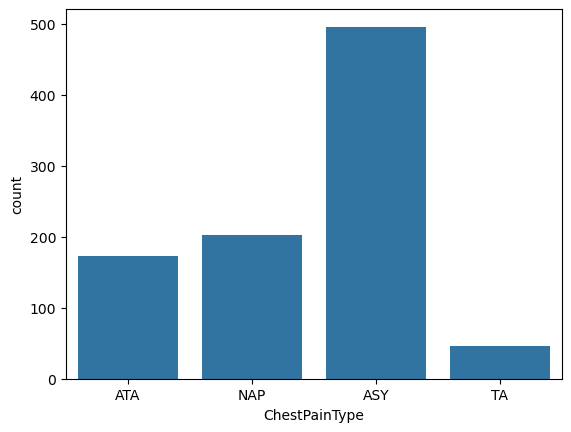

The unique values in RestingECG are ['Normal' 'ST' 'LVH']
The count of each category in RestingECG is : RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


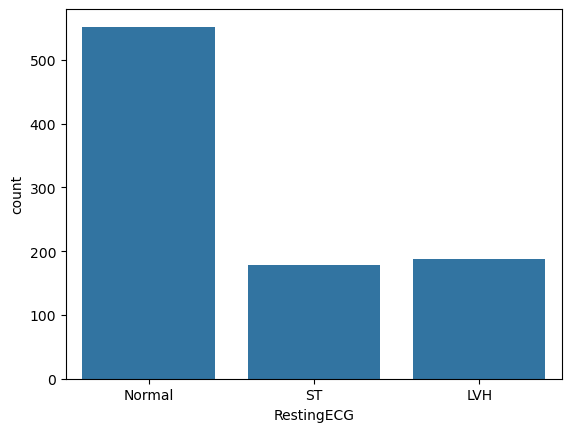

The unique values in ExerciseAngina are ['N' 'Y']
The count of each category in ExerciseAngina is : ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


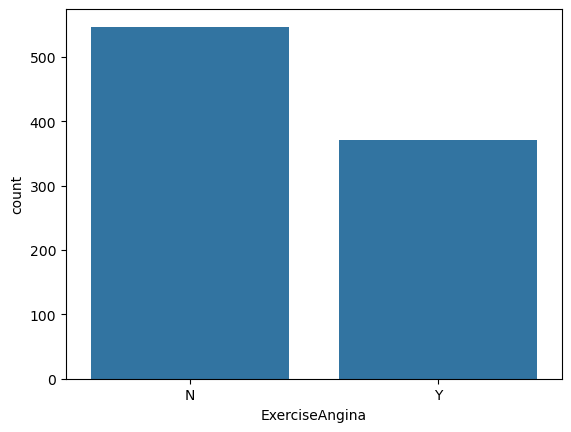

The unique values in ST_Slope are ['Up' 'Flat' 'Down']
The count of each category in ST_Slope is : ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


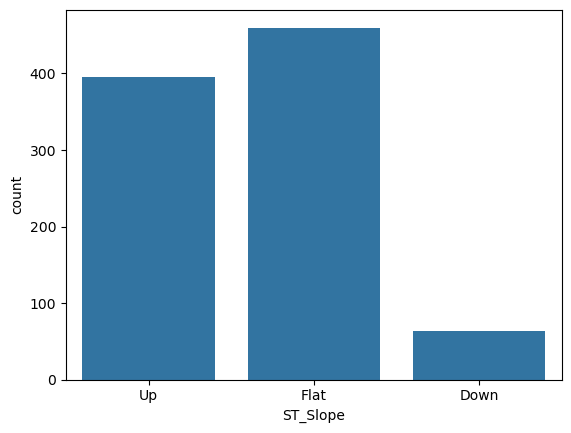

In [47]:
for i in categorical:
    print(f'The unique values in {i} are {df[i].unique()}')
    print(f'The count of each category in {i} is : {df[i].value_counts()}')
    sns.countplot(x=i , data=df)
    plt.show()

### Numerical Features:

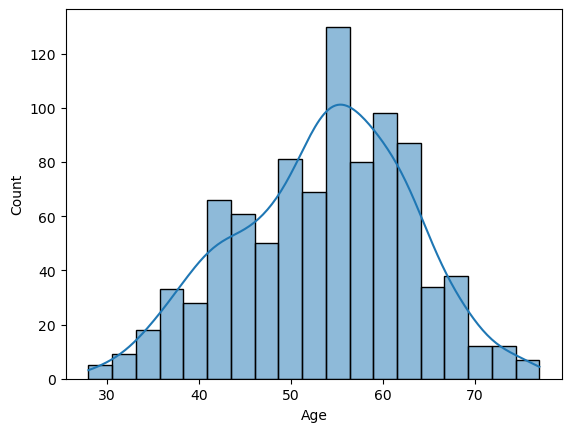

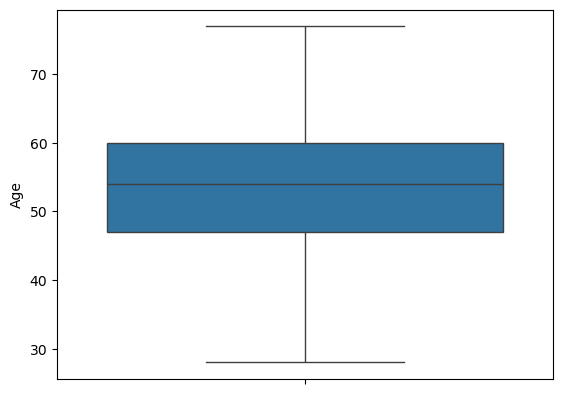

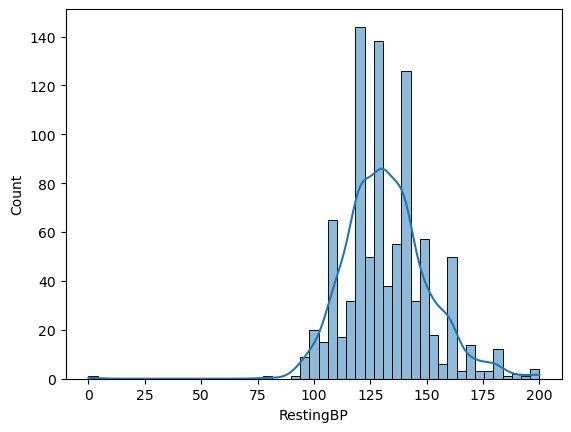

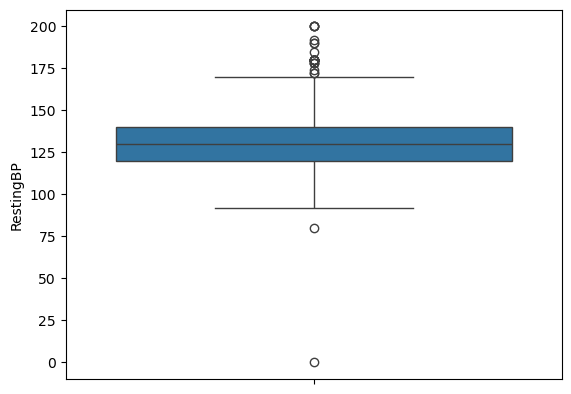

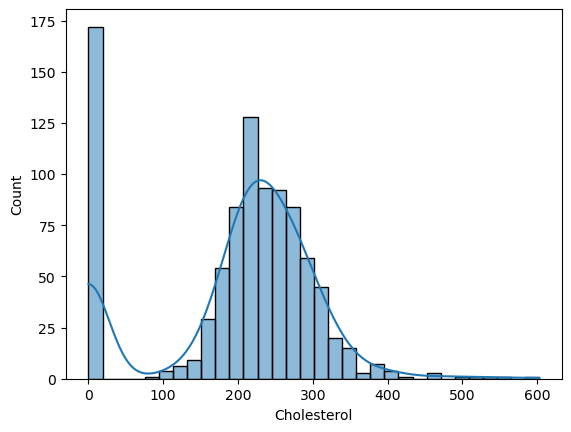

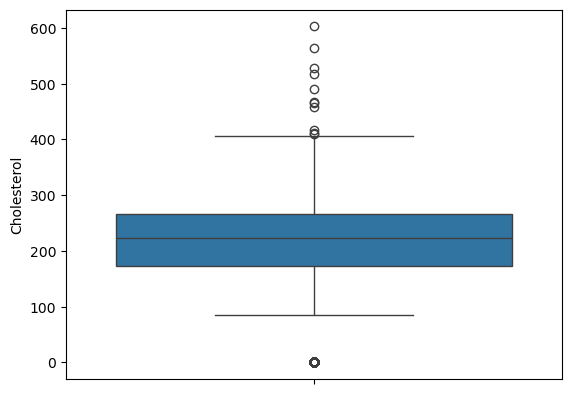

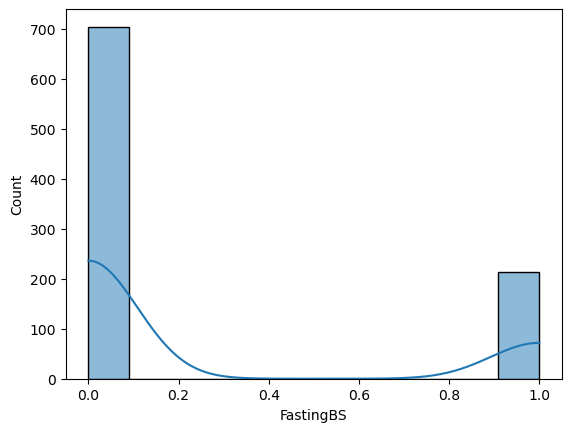

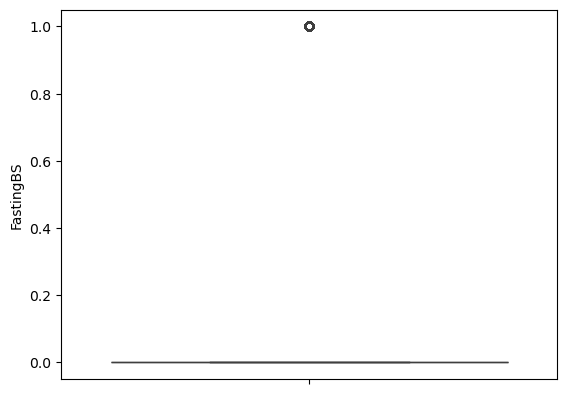

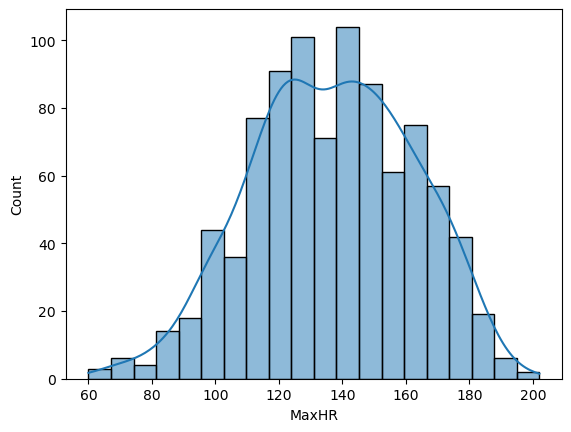

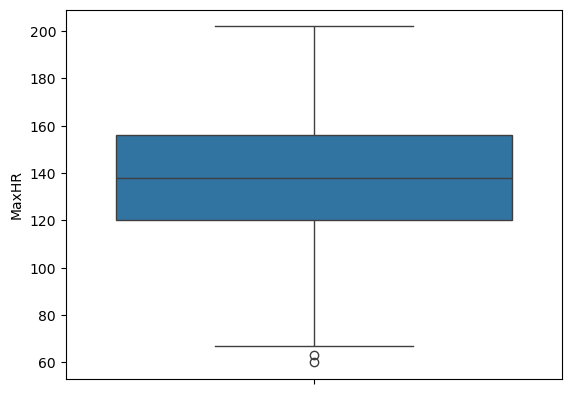

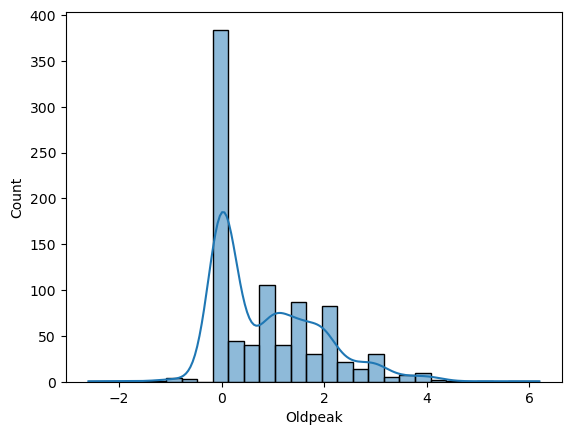

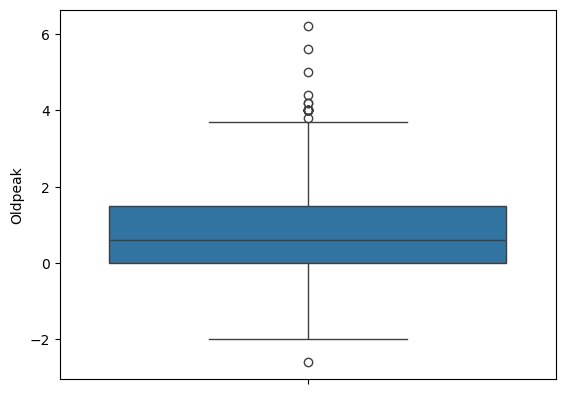

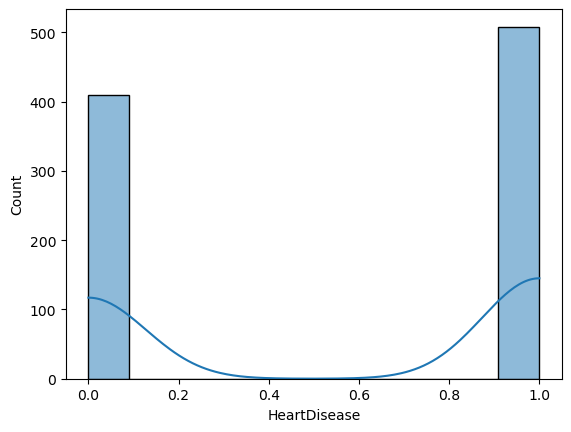

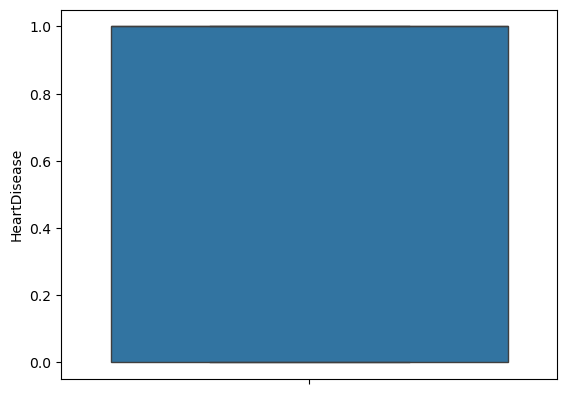

In [50]:
for i in numerical:
    sns.histplot(df[i], kde=True)
    plt.show()
    sns.boxplot(df[i])
    plt.show()

### Bivariate Analysis:

In [54]:
df.groupby('Sex')['HeartDisease'].mean()

Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64

<Axes: xlabel='Sex'>

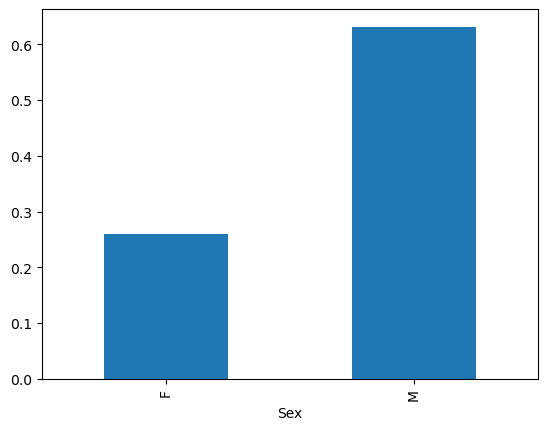

In [55]:
df.groupby('Sex')['HeartDisease'].mean().plot(kind = 'bar')

Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64


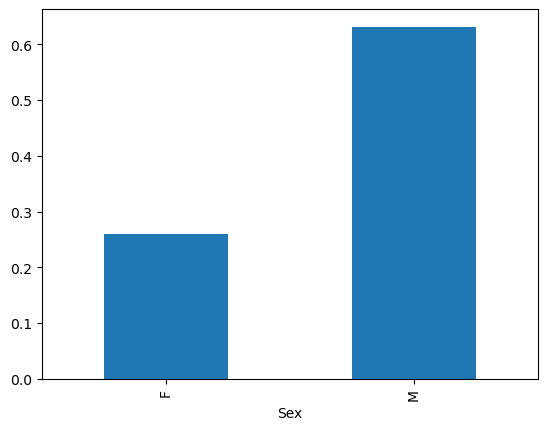

ChestPainType
ASY    0.790323
ATA    0.138728
NAP    0.354680
TA     0.434783
Name: HeartDisease, dtype: float64


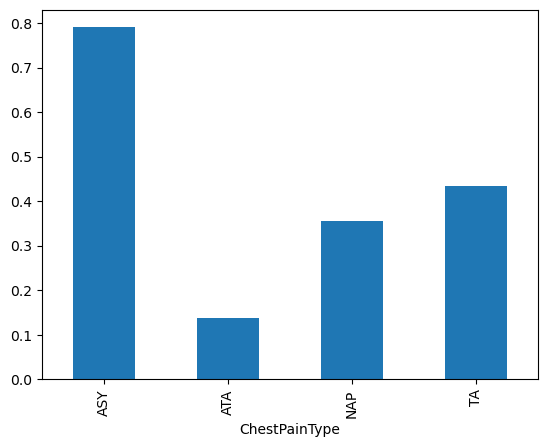

RestingECG
LVH       0.563830
Normal    0.516304
ST        0.657303
Name: HeartDisease, dtype: float64


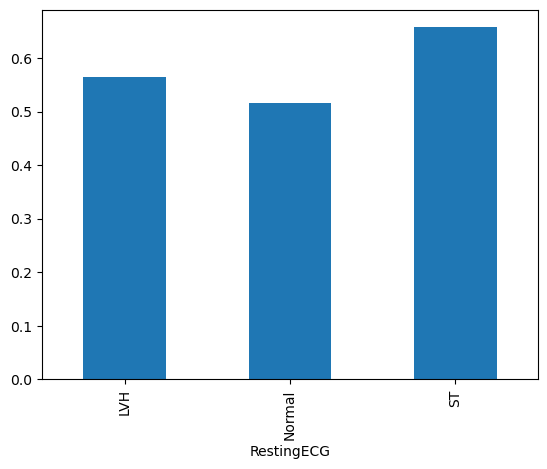

ExerciseAngina
N    0.351005
Y    0.851752
Name: HeartDisease, dtype: float64


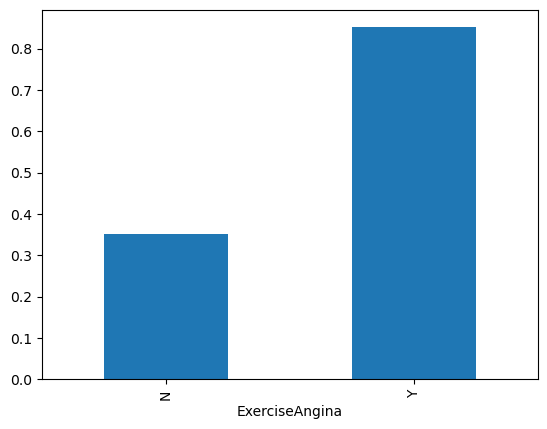

ST_Slope
Down    0.777778
Flat    0.828261
Up      0.197468
Name: HeartDisease, dtype: float64


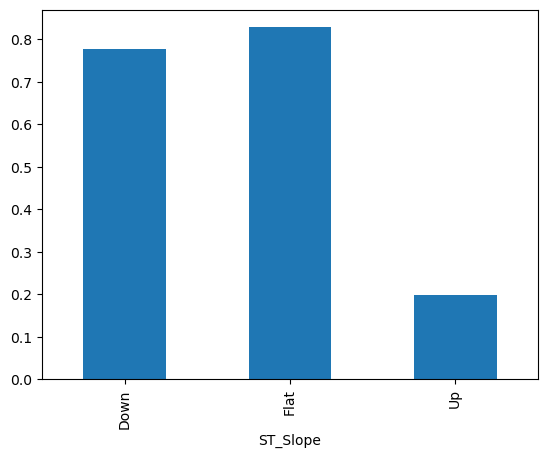

In [58]:
for i in categorical:
    print(df.groupby(i)['HeartDisease'].mean())
    df.groupby(i)['HeartDisease'].mean().plot(kind = 'bar')
    plt.show()
    

### Multivariate Analysis:

In [60]:
df[numerical].corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

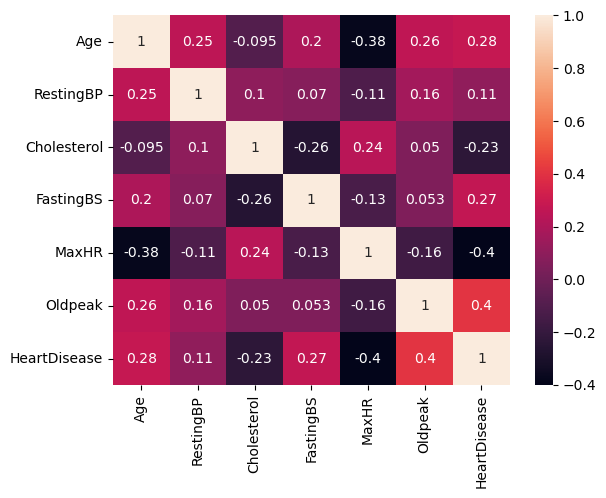

In [61]:
sns.heatmap(df[numerical].corr(), annot = True)